In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [33]:
df = pd.read_csv('covid.csv')
df.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [34]:
deaths_by_country=df.groupby('Country/Region')['Deaths'].sum().reset_index()

In [35]:
import numpy as np

bins = [0,1000,10000,np.inf]
labels = ['Low','Medium','High']

deaths_by_country['Severity'] = pd.cut(deaths_by_country['Deaths'], bins=bins, labels=labels)

In [36]:
deaths_by_country.head()

,Country/Region,Deaths,Severity
0,Afghanistan,49098,High
1,Albania,5708,Medium
2,Algeria,77972,High
3,Andorra,5423,Medium
4,Angola,1078,Medium


In [37]:
df = pd.merge(df,deaths_by_country[['Country/Region', 'Severity']], on='Country/Region', how='left')

In [39]:
print(df.columns)


Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region', 'Severity'],
      dtype='object')


In [40]:
X = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Severity'])


In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[2197   31  728   38]
 [  82  556  434   23]
 [ 213   43 2064   24]
 [  56    8  182  353]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.73      0.79      2994
           1       0.87      0.51      0.64      1095
           2       0.61      0.88      0.72      2344
           3       0.81      0.59      0.68       599

    accuracy                           0.74      7032
   macro avg       0.79      0.68      0.71      7032
weighted avg       0.77      0.74      0.73      7032



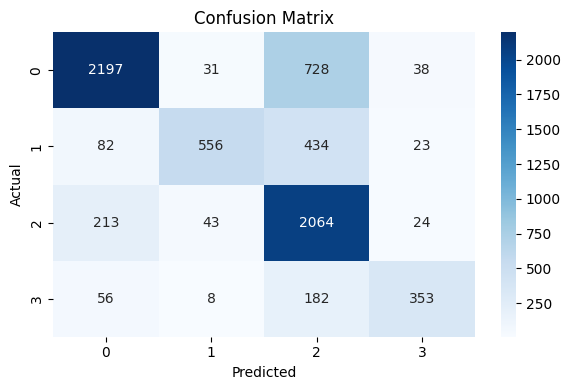

In [48]:
from  sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()